In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from sympy.vector import CoordSys3D

# 2D Infinite Parallel Plates

In a simplified model we can describe the field between the two electrodes as the field between two parallel plates:

$\vec{E} = \frac{V}{d}$

Which gives us an infinite, equal field in all directions.

/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_30996/368198965.py:9: RuntimeWarning: divide by zero encountered in divide
  V = -V_diff/Y


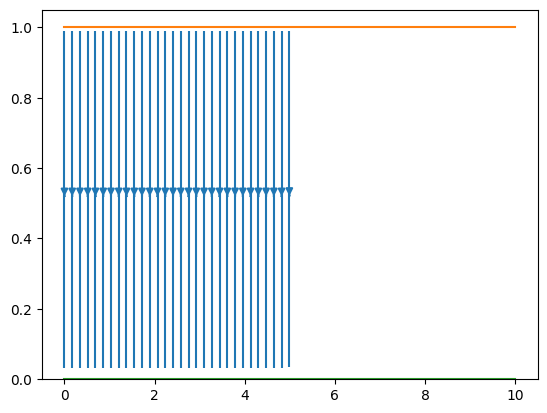

In [3]:
fig, ax1 = plt.subplots()
V_diff = 1 #Volts
x = np.arange(0,11,1)
electrode = np.ones([11,])*V_diff
plate = np.zeros([11,])

Y, X = np.mgrid[0:1:0.01, 0:5:0.01]
U = 0*X
V = -V_diff/Y

ax1.streamplot(X,Y,U,V)
ax1.plot(x, electrode)
ax1.plot(x, plate)

# 2D Infinite Non-Parallel Plates

The above is fine, but we cannot predict the outcome if the plates are not perfectly parallel, which is very likely to happen. Instead we can determine the field between two sides of a wedge. Assume that one edge of an open wedge is at a voltage potential of $V_1$ and angle of $\phi = 0$, and another is at a potential of $V_2$ and an angle of $\phi = \beta$. This will look like:

We cannot have a singularity at (0,0) and we also cannot know the field at infinity, so in order to create a well-behaved problem we can assume that the potential at two different arbitray, non-zero and non-infinity, distances from the origin, differentiated with respect to $rho$ are 0. This gives us a partial differential equation of the form:

With the solution:

$V(\phi) = V_1 + \frac{V_2 - V_1}{\beta}\phi$

We know that the electric field is:

$\vec{E} = -\nabla V$

$\vec{E} = -\frac{V_1 - V_2}{\rho\beta}\hat{a_\phi}$

Which in cartesian is:

$\vec{E} = -\frac{V_1-V_2}{\sqrt{x^2+y^2}\beta}\left(-\sin{\arctan{\frac{y}{x}}}\hat{a_x} + \cos{\arctan{\frac{y}{x}}}\hat{a_y}\right)$

Which looks like:

/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_30996/3575971147.py:12: RuntimeWarning: divide by zero encountered in divide
  U2 = -V_diff/(np.sqrt(X2**2+Y2**2)*beta)*(-np.sin(np.arctan(Y2/X2)))
/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_30996/3575971147.py:12: RuntimeWarning: invalid value encountered in divide
  U2 = -V_diff/(np.sqrt(X2**2+Y2**2)*beta)*(-np.sin(np.arctan(Y2/X2)))
/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_30996/3575971147.py:13: RuntimeWarning: divide by zero encountered in divide
  V2 = -V_diff/(np.sqrt(X2**2+Y2**2)*beta)*(np.cos(np.arctan(Y2/X2)))
/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_30996/3575971147.py:13: RuntimeWarning: invalid value encountered in divide
  V2 = -V_diff/(np.sqrt(X2**2+Y2**2)*beta)*(np.cos(np.arctan(Y2/X2)))
/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_30996/3575971147.py:15: RuntimeWarning: divide by zero encountered in divide
  mask = np.arctan(Y2/X2) > beta
/var/fo

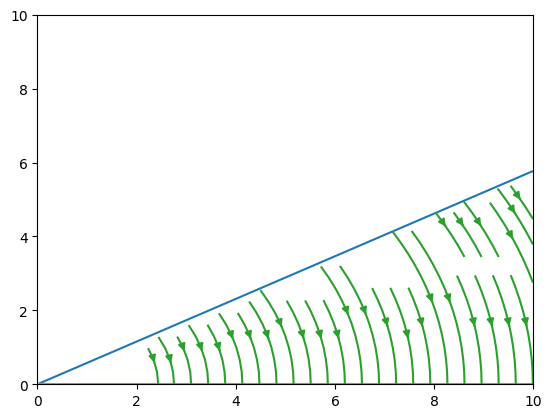

In [4]:
%matplotlib inline

fig, ax2 = plt.subplots()
beta = 30*(np.pi/180)
y_beta = x*np.tan(beta)
y_zero = x*np.tan(0)
ax2.plot(x, y_beta)
ax2.plot(x, y_zero)


Y2, X2 = np.mgrid[0:10:0.01, 0:10:0.01]
U2 = -V_diff/(np.sqrt(X2**2+Y2**2)*beta)*(-np.sin(np.arctan(Y2/X2)))
V2 = -V_diff/(np.sqrt(X2**2+Y2**2)*beta)*(np.cos(np.arctan(Y2/X2)))

mask = np.arctan(Y2/X2) > beta
U2[mask] = 0
V2[mask] = 0


ax2.streamplot(X2,Y2,U2,V2)
ax2.set_ylim([0,10])
ax2.set_xlim([0,10])

plt.show()

In [5]:
del [V_diff, x, electrode, plate, Y, X, U, V, Y2, X2, U2, V2, beta, y_beta, y_zero, mask]


# Paschen Curves Using Parallel and Non-Parallel Models

We can predict the breakdown voltage between two plates using the two above models and the expression:

$\int_{0}^{d}\alpha(E)dr = \ln{\left(1+\frac{1}{\gamma}\right)}$

where $\alpha{E}$ is

$\alpha(E) = Ape^{-Bp/E}$, where $A$ and $B$ are gas constants

The above integral can be converted to polar coordinates to get:

$\int_{\phi_1}^{\phi_2} Ape^{-\frac{Bp\rho\beta}{V_2-V_1}}\rho d\phi = \ln{\left(1+\frac{1}{\gamma}\right)}$

Everything in the integral is independent of phi and as such the problem now is:

$(\phi_2-\phi_1)Ape^{-\frac{Bp\rho\beta}{V_2-V_1}}\rho = \ln{\left(1+\frac{1}{\gamma}\right)}$

Assuming $\phi_1 = 0$ and $V_1 = 0$ and $V_{\text{cr}} = V_2$ we get:



$\frac{\phi_2 Ap\rho}{\ln\left(1+\frac{1}{\gamma}\right)} = e^\frac{Bp\rho\beta}{V_{\text{cr}}}$

$\ln{\frac{\phi_2 Ap (d/\sin{\beta})}{\ln{\left(1+\frac{1}{\gamma}\right)}}} = \frac{Bp(d/\sin{\beta})\beta}{V_{\text{cr}}}$

And finally:

$V_{\text{cr}} = \frac{Bp(d/\sin{\beta})\beta}{ln{\frac{\phi_2 Ap (d/\sin{\beta})}{\ln{\left(1+\frac{1}{\gamma}\right)}}}}$

For air, we can say A = 15, B = 365, and $\gamma$ = 0.01

$V_{\text{cr}} = \frac{Bpd}{\ln\left(\frac{Apd}{\ln\left(1+\frac{1}{\gamma}\right)}\right)}$

/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_30996/1313070474.py:10: RuntimeWarning: divide by zero encountered in log
  Vcr = (B*pd)/np.log((A*pd)/np.log(1+(1/gg)))


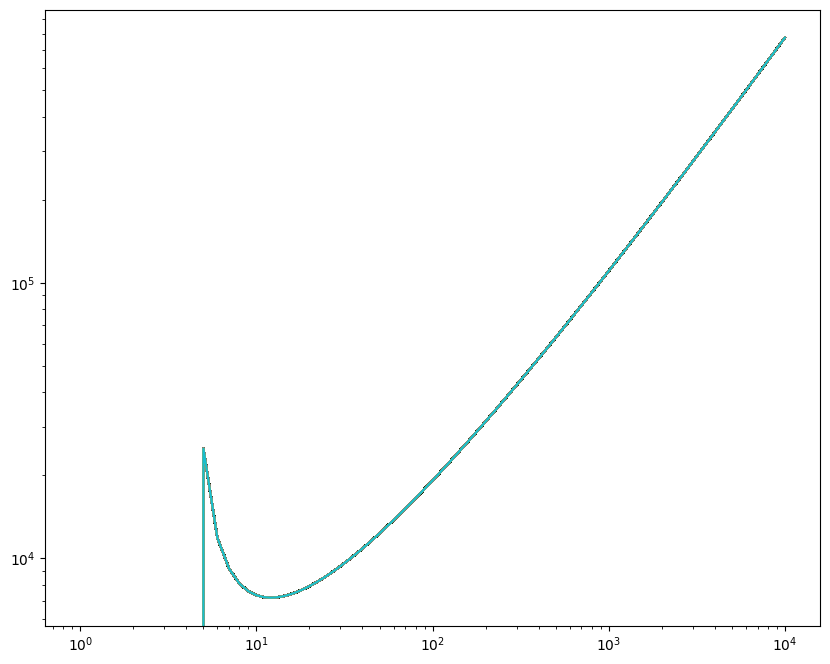

In [37]:
A = 1.04
B = 596.8
gg = 10**-2

pa = np.linspace(0, 10**4, 10**4)
pd = np.linspace(0, 10**4, 10**4)

pa, pd = np.meshgrid(pa, pd)

Vcr = (B*pd)/np.log((A*pd)/np.log(1+(1/gg)))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(211, projection='3d', )
ax.plot_surface(pa, pd, Vcr, cmap='coolwarm')


ax2 = fig.add_subplot(111)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.plot(pd, Vcr)
plt.show()